In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('cleaned_test.csv')
print(df.head())
print(df.shape)

      id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0               

In [23]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Separate target if it's categorical
target_col = 'satisfaction' 
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
    print("Target column:", target_col)
    print("Features to encode:", categorical_cols)

Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Target column: satisfaction
Features to encode: ['Gender', 'Customer Type', 'Type of Travel', 'Class']


--- CATEGORICAL VARIABLES EXPLORATION ---


--- Gender ---
Unique values: 2
Value counts:
Gender
Female    13172
Male      12804
Name: count, dtype: int64
Missing values: 0

--- Customer Type ---
Unique values: 2
Value counts:
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64
Missing values: 0

--- Type of Travel ---
Unique values: 2
Value counts:
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64
Missing values: 0

--- Class ---
Unique values: 3
Value counts:
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64
Missing values: 0


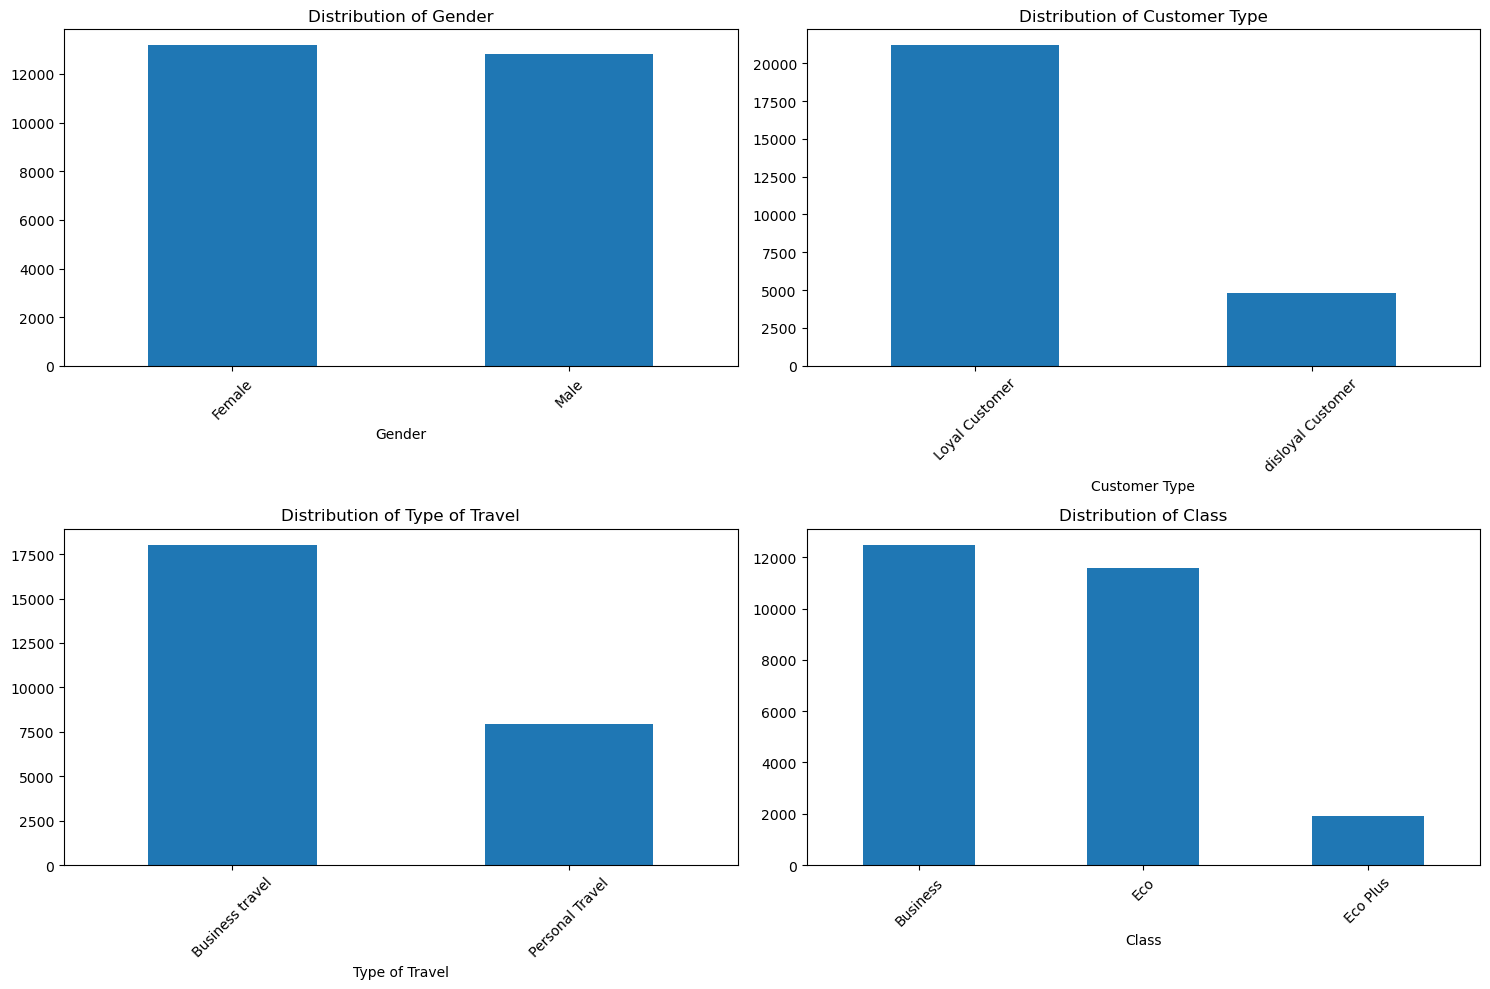

In [25]:
# Detailed exploration of categorical columns
print("--- CATEGORICAL VARIABLES EXPLORATION ---\n")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Value counts:")
    print(df[col].value_counts())
    print(f"Missing values: {df[col].isnull().sum()}")


# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

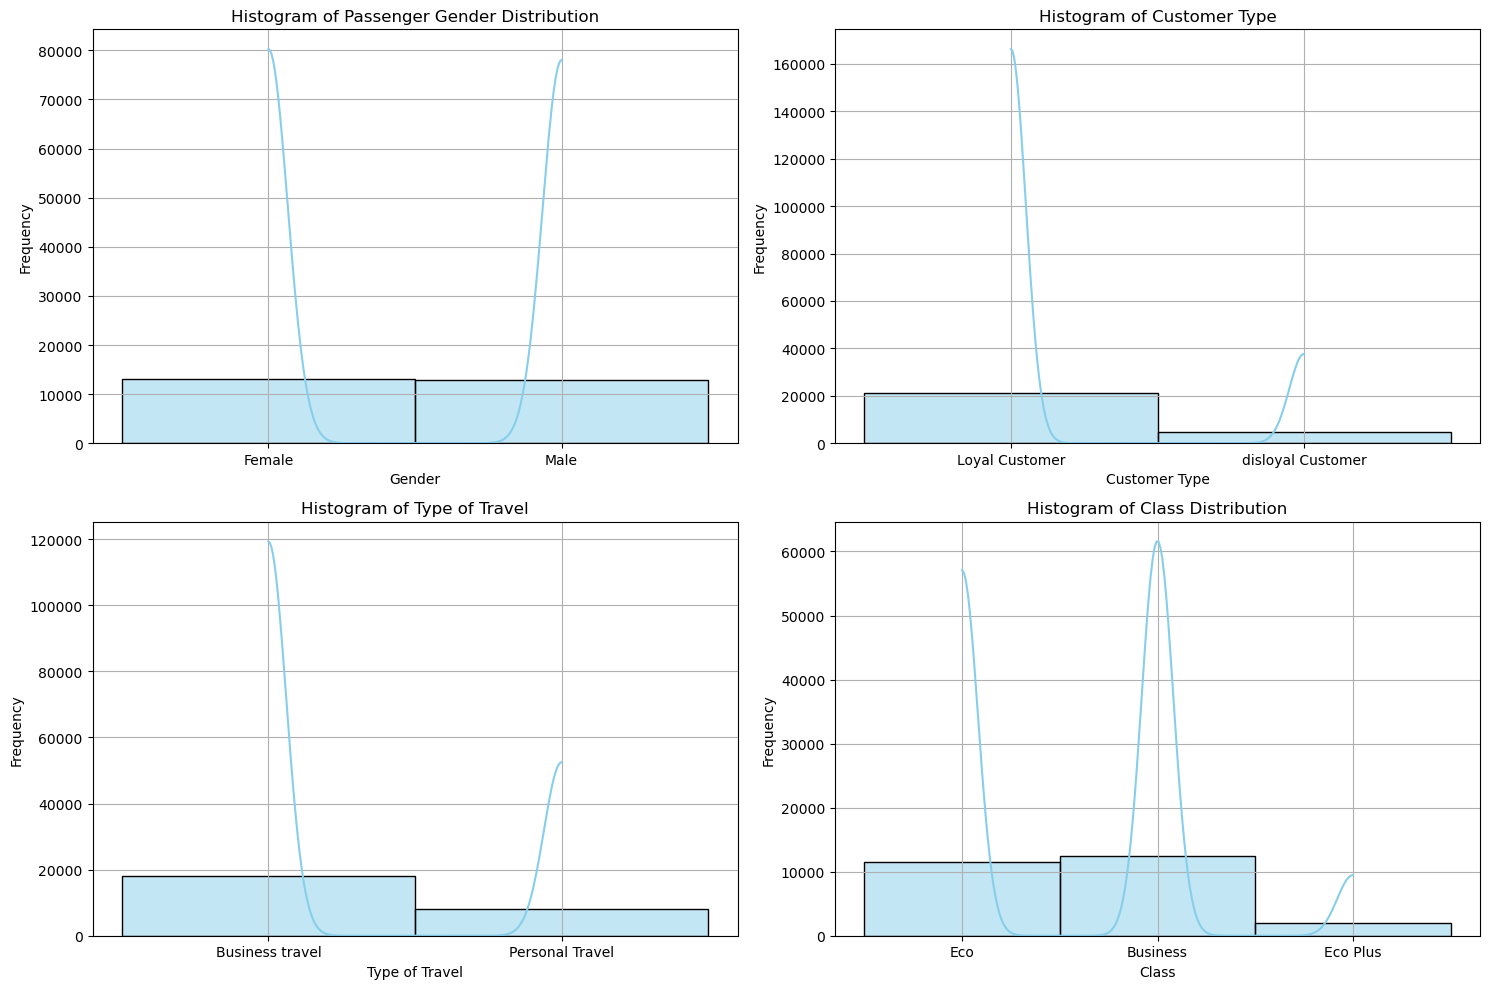

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  

sns.histplot(data=df, x='Gender', bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Passenger Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

sns.histplot(data=df, x='Customer Type', bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram of Customer Type')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

sns.histplot(data=df, x='Type of Travel', bins=20, kde=True, color='skyblue', ax=axes[2])
axes[2].set_title('Histogram of Type of Travel')
axes[2].set_xlabel('Type of Travel')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

sns.histplot(data=df, x='Class', bins=20, kde=True, color='skyblue', ax=axes[3])
axes[3].set_title('Histogram of Class Distribution')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Frequency')
axes[3].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [29]:
# Label encode the target (satisfaction: 'satisfied'- 1, 'neutral or dissatisfied'-0)
label_encoder = LabelEncoder()
df['satisfaction_encoded'] = label_encoder.fit_transform(df[target_col])
print("Target encoding mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(df[['satisfaction', 'satisfaction_encoded']].head())

Target encoding mapping: {'neutral or dissatisfied': 0, 'satisfied': 1}
              satisfaction  satisfaction_encoded
0                satisfied                     1
1                satisfied                     1
2  neutral or dissatisfied                     0
3                satisfied                     1
4                satisfied                     1


In [31]:
# Define the transformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply encoding
df_encoded = preprocessor.fit_transform(df.drop(columns=[target_col]))  # Drop original target
feature_names = preprocessor.get_feature_names_out()

# Create new DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=feature_names)
df_encoded[target_col + '_encoded'] = df['satisfaction_encoded']  # Add encoded target

print("Encoded DataFrame shape:", df_encoded.shape)
print(df_encoded.head())

Encoded DataFrame shape: (25976, 26)
   cat__Gender_Male  cat__Customer Type_disloyal Customer  \
0               0.0                                   0.0   
1               0.0                                   0.0   
2               1.0                                   1.0   
3               1.0                                   0.0   
4               0.0                                   0.0   

   cat__Type of Travel_Personal Travel  cat__Class_Eco  cat__Class_Eco Plus  \
0                                  0.0             1.0                  0.0   
1                                  0.0             0.0                  0.0   
2                                  0.0             1.0                  0.0   
3                                  0.0             0.0                  0.0   
4                                  0.0             1.0                  0.0   

   remainder__id  remainder__Age  remainder__Flight Distance  \
0        19556.0            52.0                       16

In [33]:
# Check for any remaining object types
print("Data types after encoding:\n", df_encoded.dtypes)

df_encoded.to_csv('encoded_test.csv', index=False)
print("Encoded dataset saved as 'encoded_test.csv'")

Data types after encoding:
 cat__Gender_Male                                float64
cat__Customer Type_disloyal Customer            float64
cat__Type of Travel_Personal Travel             float64
cat__Class_Eco                                  float64
cat__Class_Eco Plus                             float64
remainder__id                                   float64
remainder__Age                                  float64
remainder__Flight Distance                      float64
remainder__Inflight wifi service                float64
remainder__Departure/Arrival time convenient    float64
remainder__Ease of Online booking               float64
remainder__Gate location                        float64
remainder__Food and drink                       float64
remainder__Online boarding                      float64
remainder__Seat comfort                         float64
remainder__Inflight entertainment               float64
remainder__On-board service                     float64
remainder__Leg room 